In [2]:
source("https://bioconductor.org/biocLite.R")

Bioconductor version 3.5 (BiocInstaller 1.26.0), ?biocLite for help


In [8]:
biocLite("BSgenome.Hsapiens.UCSC.hg38")


The downloaded binary packages are in
	/var/folders/qq/39_mm0216sd1vftr4z7q6qxm0000gp/T//RtmpTQ0t6o/downloaded_packages


Warning message:
“package ‘BiocInstaller’ was built under R version 3.4.1”Bioconductor version 3.5 (BiocInstaller 1.26.1), ?biocLite for help
'BiocInstaller' updated to version 1.26.1
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.5 (BiocInstaller 1.26.1), R 3.4.0 (2017-04-21).
Installing package(s) ‘BSgenome.Hsapiens.UCSC.hg38’
installing the source package ‘BSgenome.Hsapiens.UCSC.hg38’

Old packages: 'BH', 'BSgenome', 'dplyr', 'gdtools', 'GenomicAlignments',
  'GenomicRanges', 'gridExtra', 'httr', 'IRanges', 'knitr', 'Matrix', 'mgcv',
  'openssl', 'psych', 'RcppArmadillo', 'rlang', 'rstudioapi', 'S4Vectors',
  'scales', 'shiny', 'svglite', 'tibble', 'tidyr'


In [19]:
biocLite("forcats")

BioC_mirror: https://bioconductor.org
Using Bioconductor 3.5 (BiocInstaller 1.26.1), R 3.4.0 (2017-04-21).
Installing package(s) ‘forcats’



The downloaded binary packages are in
	/var/folders/qq/39_mm0216sd1vftr4z7q6qxm0000gp/T//RtmpTQ0t6o/downloaded_packages


Old packages: 'BH', 'BSgenome', 'dplyr', 'gdtools', 'GenomicAlignments',
  'GenomicRanges', 'gridExtra', 'httr', 'IRanges', 'knitr', 'Matrix', 'mgcv',
  'openssl', 'psych', 'RcppArmadillo', 'rlang', 'rstudioapi', 'S4Vectors',
  'scales', 'shiny', 'svglite', 'tibble', 'tidyr'


In [5]:
library(BSgenome.Hsapiens.UCSC.hg38)
library(org.Hs.eg.db)
library(hom.Mm.inp.db)
library(rtracklayer)
library(GenomicFeatures)
library(broom)
library(stringr)
library(magrittr)
library(tidyverse)
library(readxl)
library(forcats)

# color blind palette
# http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/#a-colorblind-friendly-palette
cbPalette <- c("#666666", "#E69F00", "#56B4E9", 
               "#009E73", "#CC79A7", "#0072B2", "#D55E00", "#F0E442")

theme_set(theme_classic(base_family = "Helvetica") +
theme(          
  strip.background = element_blank(),
  axis.line = element_line(size=.5, color = "darkgrey")
))
options(warn = -1)

Loading required package: BSgenome
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min

Loading required package: S4Vectors
Loading require

### CDS annotations

In [28]:
genome <- BSgenome.Hsapiens.UCSC.hg38
cdsfile <- '../../../../../sequence_annotation_files/gencode.v24.canonical_ccds_transcripts.20170315.gff3'

cds <- import.gff3(cdsfile) %>% 
  as_tibble %>% 
  filter(type == 'CDS') %>% 
  group_by(transcript_id) %>% 
  slice(1) %>% 
  select(transcript_id, gene_name, protein_id) %>% 
  print

# A tibble: 18,660 x 3
# Groups:   transcript_id [18,660]
        transcript_id gene_name        protein_id
                <chr>     <chr>             <chr>
 1  ENST00000000233.9      ARF5 ENSP00000000233.5
 2  ENST00000000412.7      M6PR ENSP00000000412.3
 3 ENST00000000442.10     ESRRA ENSP00000000442.6
 4  ENST00000001008.5     FKBP4 ENSP00000001008.4
 5  ENST00000001146.6   CYP26B1 ENSP00000001146.2
 6  ENST00000002125.8   NDUFAF7 ENSP00000002125.4
 7 ENST00000002165.10     FUCA2 ENSP00000002165.5
 8 ENST00000002501.10    DBNDD1 ENSP00000002501.6
 9  ENST00000002596.5    HS3ST1 ENSP00000002596.5
10  ENST00000002829.7    SEMA3F ENSP00000002829.3
# ... with 18,650 more rows


### All cds for humans 

In [27]:
human_annotations <- '../../../../../sequence_annotation_files/gencode.v24.annotation.gff3'

human_cds <- import.gff3(human_annotations) %>% 
  as_tibble %>% 
  filter(type == 'CDS') %>%
  select(transcript_id, gene_name, protein_id) %>% 
  group_by(transcript_id) %>%  
  slice(1) %>% 
  print

# A tibble: 93,855 x 3
# Groups:   transcript_id [93,855]
        transcript_id gene_name        protein_id
                <chr>     <chr>             <chr>
 1  ENST00000000233.9      ARF5 ENSP00000000233.5
 2  ENST00000000412.7      M6PR ENSP00000000412.3
 3 ENST00000000442.10     ESRRA ENSP00000000442.6
 4  ENST00000001008.5     FKBP4 ENSP00000001008.4
 5  ENST00000001146.6   CYP26B1 ENSP00000001146.2
 6  ENST00000002125.8   NDUFAF7 ENSP00000002125.4
 7 ENST00000002165.10     FUCA2 ENSP00000002165.5
 8 ENST00000002501.10    DBNDD1 ENSP00000002501.6
 9  ENST00000002596.5    HS3ST1 ENSP00000002596.5
10  ENST00000002829.7    SEMA3F ENSP00000002829.3
# ... with 93,845 more rows


### All cds for mouse

In [29]:
mouse_annotations <- '../../../../../sequence_annotation_files/gencode.vM9.annotation.gff3.gz'

mouse_cds <- import.gff3(mouse_annotations) %>% 
  as_tibble %>% 
  filter(type == 'CDS') %>%
  select(transcript_id, gene_name, protein_id) %>% 
  group_by(transcript_id) %>%  
  slice(1) %>% 
  print

# A tibble: 57,324 x 3
# Groups:   transcript_id [57,324]
           transcript_id gene_name           protein_id
                   <chr>     <chr>                <chr>
 1  ENSMUST00000000001.4     Gnai3 ENSMUSP00000000001.4
 2 ENSMUST00000000003.13      Pbsn ENSMUSP00000000003.7
 3  ENSMUST00000000010.8     Hoxb9 ENSMUSP00000000010.8
 4 ENSMUST00000000028.13     Cdc45 ENSMUSP00000000028.7
 5 ENSMUST00000000033.11      Igf2 ENSMUSP00000000033.5
 6  ENSMUST00000000049.5      Apoh ENSMUSP00000000049.5
 7  ENSMUST00000000058.6      Cav2 ENSMUSP00000000058.6
 8  ENSMUST00000000080.6      Klf6 ENSMUSP00000000080.6
 9 ENSMUST00000000087.12     Scmh1 ENSMUSP00000000087.6
10  ENSMUST00000000090.6     Cox5a ENSMUSP00000000090.6
# ... with 57,314 more rows


### Read count and fold change data for genes in HEK293T cells

In [38]:
countdata  <- read_tsv('../tables/cds.counts.20170615.tsv', col_types = c(col_character()))
lfcdata <- read_tsv('../tables/foldchange_samplepairs_201706221.tsv', col_types = c(col_character()))

subsettx <- countdata %>% 
  # select only tx having >100 counts across all samples
  filter_at(vars(matches('X293t.*(arg)|(leu)|(torin1)|(rich)')), all_vars(. >= 100)) %>% 
  select(transcript_id, length)

print(subsettx)

# A tibble: 3,136 x 2
        transcript_id length
                <chr>  <int>
 1 ENST00000309268.10   1389
 2  ENST00000621411.1    411
 3  ENST00000229239.9   1008
 4  ENST00000331789.9   1128
 5  ENST00000316084.9    792
 6  ENST00000578186.2    312
 7  ENST00000336023.9   1356
 8  ENST00000403683.1    411
 9  ENST00000369159.2    393
10  ENST00000377803.3    312
# ... with 3,126 more rows


### plot gene fold changes vs length

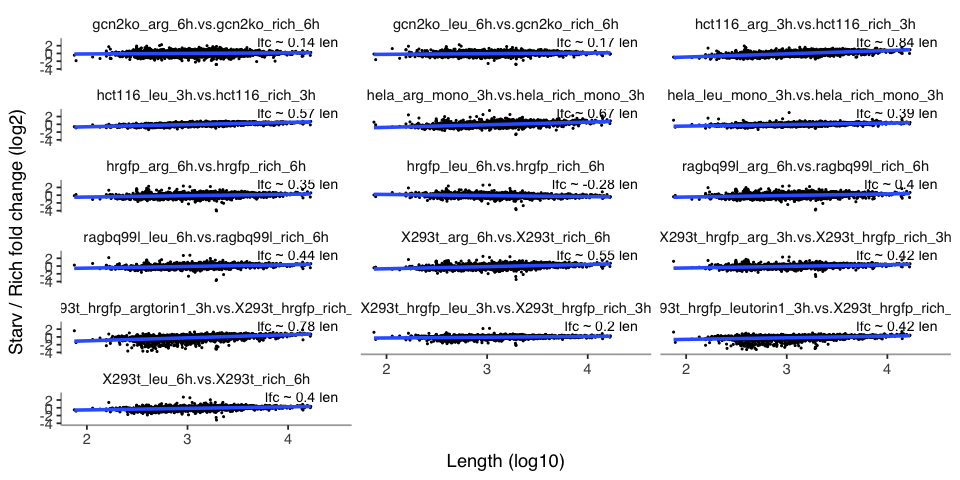

In [60]:
options(repr.plot.width = 8, repr.plot.height = 4)

subsetdata <- lfcdata %>% 
  right_join(subsettx, by = 'transcript_id') %>% 
  mutate(loglength = log10(length)) %>% 
  # select samples for plotting
  select(loglength, matches('(arg)|(leu)')) %>%
  # reshape 
  gather(samplepair, lfc, -loglength)

# calculate slope of linear model regression
stats <- subsetdata %>% 
  group_by(samplepair) %>% 
  nest() %>% 
  # fit linear model for each sample, note that 'data' col in created by nest()
  mutate(model = map(data, ~ lm(lfc ~ loglength, data = .))) %>% 
  # extract fitting parameters
  mutate(fitparam = map(model, broom::tidy)) %>% 
  unnest(fitparam) %>% 
  # this is the indpt variable fit above
  filter(term == "loglength") %>% 
  # select cols that are of interest
  select(samplepair, estimate, std.error) %>% 
  # create columns for adding to plot
  mutate(x = 4.5, y = 3, lab = paste0('lfc ~ ', round(estimate, 2), ' len'))


ggplot(subsetdata, aes(loglength, lfc)) +
  geom_point(size = 0.2) +
  geom_smooth(method = 'lm') +
  facet_wrap(~samplepair, ncol = 3, scales = "fixed") + 
  labs(x = "Length (log10)", y = "Starv / Rich fold change (log2)") +
  geom_text(aes(x, y, label = lab), data = stats, hjust = 1, size = 3)

### calculate TE fold change and plot vs length

In [63]:
options(repr.plot.width = 8, repr.plot.height = 2.5)

subsetdata <- lfcdata %>% 
  # select TE columns
  select(transcript_id, matches('mono.+total')) %>% 
  # calculate TE fold change w.r.t untr sample
  mutate_if(is.numeric, funs(. - hela_rich_mono_3h.vs.hela_rich_total_3h)) %>% 
  select(-matches("rich")) %>% 
  right_join(subsettx, by = 'transcript_id') %>% 
  mutate(loglength = log10(length)) %>% 
  # select samples for plotting
  select(loglength, matches('(mono)|(total)')) %>%
  # reshape 
  gather(samplepair, lfc, -loglength)

# calculate slope of linear model regression
stats <- subsetdata %>% 
  group_by(samplepair) %>% 
  nest() %>% 
  # fit linear model for each sample, note that 'data' col in created by nest()
  mutate(model = map(data, ~ lm(lfc ~ loglength, data = .))) %>% 
  # extract fitting parameters
  mutate(fitparam = map(model, broom::tidy)) %>% 
  unnest(fitparam) %>% 
  # this is the indpt variable fit above
  filter(term == "loglength") %>% 
  # select cols that are of interest
  select(samplepair, estimate, std.error) %>% 
  # create columns for adding to plot
  mutate(x = 4.5, y = -3.8, lab = paste0('lfc ~ ', round(estimate, 2), ' len'))

ggplot(subsetdata, aes(loglength, lfc)) +
  geom_point(size = 0.2) +
  geom_smooth(method = 'lm') +
  facet_wrap(~samplepair, ncol = 3, scales = "fixed") +
  labs(x = "Length (log10)", y = "TE fold change (log2)") +
  geom_text(aes(x, y, label = lab), data = stats, hjust = 1, size = 3)

ERROR: Error in mutate_impl(.data, dots): Evaluation error: object 'X293t_leu_6h.vs.X293t_rich_6h' not found.


### List of genes sorted by TE fold-change under arg starvation

In [ ]:
subsetdata <- lfcdata %>% 
  # select TE columns
  select(transcript_id, matches('mono.+total')) %>% 
  # calculate TE fold change w.r.t untr sample
  mutate_if(is.numeric, funs(. - hela_rich_mono_3h.vs.hela_rich_total_3h)) %>% 
  select(-matches("rich")) %>% 
  rename_if(is_numeric,. %>% gsub('hela_(arg|leu|argleurap)_.*', '\\1', .)) %>% 
  right_join(subsettx, by = 'transcript_id') %>% 
  left_join(cds) %>% 
  arrange(desc(arg)) %T>%
  print

### Read counts and fold changes for all combinations

In [64]:
countdata  <- read_tsv('../tables/cds.counts.20170615.tsv', col_types = c(col_character()))
lfcdata <- read_tsv('../tables/foldchange_samplepairs_201706221.tsv', col_types = c(col_character()))

subsetsamples <- read_tsv('../tables/samplepairs_for_deseq2.tsv', 
                          col_types = c(col_character())) %>% 
  gather(sample, samplename) %>% 
  distinct(samplename) %>% 
  pull(samplename) %>% 
  str_replace('293', 'X293')

subsettx <- countdata %>% 
  # select only tx having >100 counts across all samples used for fold change
  filter_at(vars(one_of(subsetsamples)), all_vars(. >= 100)) %>% 
  select(transcript_id, length)

lfcdata  <- lfcdata %>% 
  right_join(subsettx, by = "transcript_id")

print(subsettx)

# A tibble: 3,438 x 2
        transcript_id length
                <chr>  <int>
 1 ENST00000309268.10   1389
 2  ENST00000621411.1    411
 3  ENST00000229239.9   1008
 4  ENST00000331789.9   1128
 5  ENST00000316084.9    792
 6  ENST00000578186.2    312
 7  ENST00000336023.9   1356
 8  ENST00000403683.1    411
 9  ENST00000369159.2    393
10  ENST00000377803.3    312
# ... with 3,428 more rows


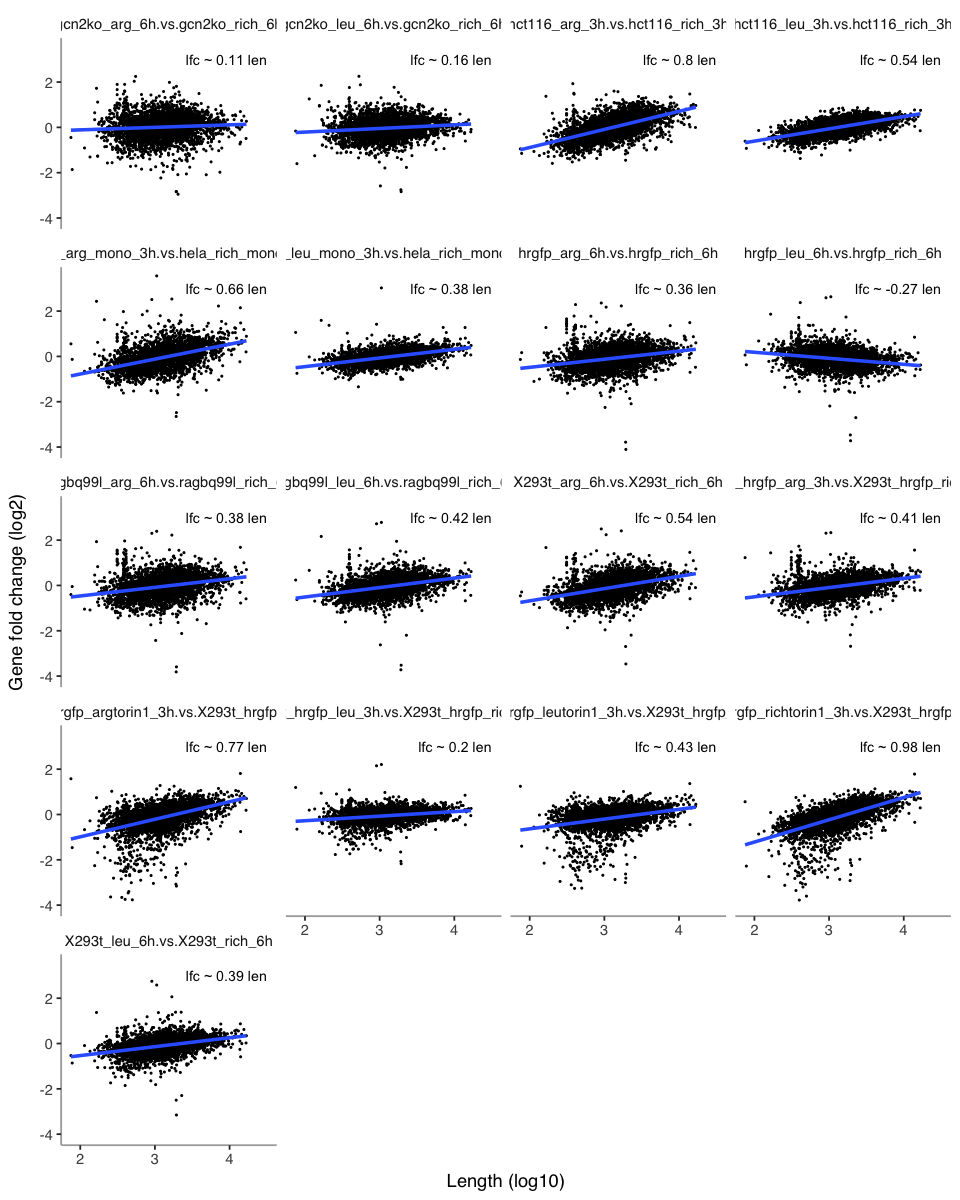

In [65]:
options(repr.plot.width = 8, repr.plot.height = 10)

subsetdata <- lfcdata %>% 
  mutate(loglength = log10(length)) %>% 
  # select samples for plotting
  select(-transcript_id, -gene_name, -baseMean, -length ) %>%
  # reshape 
  gather(samplepair, lfc, -loglength)

# calculate slope of linear model regression
stats <- subsetdata %>% 
  group_by(samplepair) %>% 
  nest() %>% 
  # fit linear model for each sample, note that 'data' col in created by nest()
  mutate(model = map(data, ~ lm(lfc ~ loglength, data = .))) %>% 
  # extract fitting parameters
  mutate(fitparam = map(model, broom::tidy)) %>% 
  unnest(fitparam) %>% 
  # this is the indpt variable fit above
  filter(term == "loglength") %>% 
  # select cols that are of interest
  select(samplepair, estimate, std.error) %>% 
  # create columns for adding to plot
  mutate(x = 4.5, y = 3, lab = paste0('lfc ~ ', round(estimate, 2), ' len'))


ggplot(subsetdata, aes(loglength, lfc)) +
  geom_point(size = 0.2) +
  geom_smooth(method = 'lm') +
  facet_wrap(~samplepair, ncol = 4, scales = "fixed") + 
  labs(x = "Length (log10)", y = "Gene fold change (log2)") +
  geom_text(aes(x, y, label = lab), data = stats, hjust = 1, size = 3)

### Read in ATF4 / CHOP mouse targets

In [7]:
atf4_chop_chipseq_mouse <- read_xlsx('../db/atf4chop_han2013/NIHMS485042-supplement-Table_2.xlsx', skip = 2)

In [8]:
atf4_chop_chipseq_mouse %>% 
  group_by(Overlap) %>% 
  summarise(n())

Overlap,n()
ATF4_Only,254
CHOP_Only,103
Common,218


In [19]:
atf4_chop_chipseq_mouse

Overlap,Symbol,Entrez ID,Chromosome,ATF4 Peak Start,ATF4 Peak End,ATF4 dTSS,CHOP Peak Start,CHOP Peak End,CHOP dTSS,X__1,X__2,Entrez gene IDs
Common,Atf3,11910,chr1,193007013,193007621,0,193007076,193007302,0,NA,CHOP_ONLY,103
Common,Bcat2,12036,chr7,52823084,52824389,-1343,52823964,52824180,-1552,NA,Common,218
Common,Bdnf,12064,chr2,109517649,109518731,461,109518356,109518546,1168,NA,ATF4_ONLY,254
Common,Cebpg,12611,chr7,35840693,35841890,0,35841166,35841291,294,NA,NA,NA
Common,Clcn3,12725,chr8,63432873,63433768,0,63433450,63433787,0,NA,NA,NA
Common,Cxadr,13052,chr16,78302865,78303505,930,78302880,78303324,945,NA,NA,NA
Common,Ddit3,13198,chr10,126726068,126728031,0,126727399,126727652,-213,NA,NA,NA
Common,Eif4g2,13690,chr7,118223550,118223898,2646,118223565,118223790,2754,NA,NA,NA
Common,B4galnt2,14422,chr11,95775233,95775864,321,95775402,95775799,386,NA,NA,NA
Common,Gng5,14707,chr3,146163093,146163903,294,146163411,146163693,612,NA,NA,NA


In [30]:
atf4_target_mouse_proteins <- mouse_cds %>% 
  # extract all mouse genes in atf4 targets
  filter(gene_name %in% atf4_chop_chipseq_mouse[['Symbol']]) %>% 
  # clean Ensembl protein iD for homolog search
  mutate(protein_id = str_extract(protein_id, "^[^\\.]+")) %>% 
  # get distinct proteins
  distinct(protein_id) %>% 
  # pick only proteins that have human homologs
  inner_join(tibble(protein_id = mappedkeys(hom.Mm.inpHOMSA)), by = "protein_id")

# find human homolog protein
humanhomologs <- hom.Mm.inpHOMSA[atf4_target_mouse_proteins[['protein_id']]] %>% 
  as.list %>% unlist %>% tibble %>% 
  set_colnames("protein_id")

# convert humann homolog proteins in human gene symbols
human_atf4_targets <- human_cds %>% 
  mutate(protein_id = str_extract(protein_id, "^[^\\.]+")) %>% 
  ungroup %>% 
  right_join(humanhomologs) %>% 
  select(gene_name) %>%
  distinct(gene_name) %>% 
  # add ATF4 which is technically not a target but we want to plot
  bind_rows(list('gene_name' = 'ATF4')) %>% 
  print

Joining, by = "protein_id"


# A tibble: 367 x 1
   gene_name
       <chr>
 1    SCPEP1
 2  SERPINF1
 3     ITGB7
 4     COASY
 5   ANGPTL4
 6      GARS
 7     WARS2
 8     CLCN3
 9      <NA>
10     WISP1
# ... with 357 more rows


### Read in mTORC1 human targets

In [105]:
torin1_rp_human <- read_xls('../db/torin1_thoreen2012/nature11083-s2_sortedbyRDnotTE.xls',skip=2)
#these are log2fc for ribo density all genes for torin1/vehicle in WT & 4ebp1 DKO

In [106]:
torin1_rp_human %>% 
  group_by("Gene symbol") %>% 
  summarise(n())

"""Gene symbol""",n()
Gene symbol,4840


In [109]:
subset_targets=torin1_rp_human[1:150,] #take the top 150 genes (ranked according to most negative Translational efficiency fold change for torin1/vehicle in wt cells)
targetlist <- toupper(subset_targets[['Gene symbol']]) #convert gene symbols to upper case
targetlist
length(targetlist)

[1] "CAND2"         "PABPC1"        "EEF2"          "EEF1A1"       
  [5] "RPS18"         "RPS19"         "TPT1"          "EEF1B2"       
  [9] "RPS4X"         "YBX1"          "RPL14"         "RPL18A"       
 [13] "RPS20"         "RPL32"         "RPLP0"         "RPL13A"       
 [17] "RPS24"         "RPL22"         "RPS26"         "EEF1G"        
 [21] "LAMA5"         "HSPA8"         "RPL4"          "RPS15A"       
 [25] "EIF3F"         "RPL8"          "RPS9"          "RPS5"         
 [29] "RPL35"         "RPLP2"         "RPS10"         "ODC1"         
 [33] "COX7A2L"       "RPL34"         "GNB2L1"        "RPL7"         
 [37] "RPL30"         "RPL7A"         "RPL6"          "RPL21"        
 [41] "RPS3A"         "RPL23"         "RPL9"          "RPL37"        
 [45] "RPL39"         "RPL24"         "CCNE1"         "RPL23A"       
 [49] "RPL12"         "NT5DC2"        "PRCP"          "RPS3"         
 [53] "EIF3H"         "FAU"           "RPL10A"        "RPS16"        
 [57] "RPS25"         "RPS15"         "RPS11"         "QARS"         
 [61] "MOGS"          "RPS14"         "RPL18"         "IPO7"         
 [65] "WDR89"         "2700060E02RIK" "RPS21"         "HSP90AB1"     
 [69] "COL4A1"        "RPL5"          "EIF4B"         "RPL37A"       
 [73] "HSPG2"         "RPLP1"         "CCNE2"         "GLRX3"        
 [77] "GYG"           "VDAC1"         "PABPC4"        "MAPKAPK2"     
 [81] "NUP35"         "AKR1B3"        "NME2"          "CSDA"         
 [85] "IPO5"          "VIM"           "MTHFD2"        "ACTG1"        
 [89] "CLPTM1"        "RWDD1"         "TAF10"         "CHCHD3"       
 [93] "MTCH1"         "SSR4"          "1500003O03RIK" "CCT2"         
 [97] "GPI1"          "NPM1"          "NAP1L1"        "NSA2"         
[101] "GLUD1"         "PABPN1"        "FAM98A"        "COL1A1"       
[105] "PURB"          "TMED10"        "EIF3L"         "CCT4"         
[109] "NOMO1"         "E2F4"          "STX12"         "PTK7"         
[113] "CSDE1"         "ZFP593"        "MRPS23"        "RNF126"       
[117] "GCN1L1"        "RPL38"         "NCLN"          "UBE2S"        
[121] "SEC14L1"       "RPL41"         "NAA10"         "SNX5"         
[125] "PEBP1"         "CCND3"         "BRI3BP"        "FKBP9"        
[129] "CNN2"          "LRRC47"        "UPF3A"         "MRPL30"       
[133] "CCND1"         "CNIH"          "EIF3I"         "C1QBP"        
[137] "COL3A1"        "ATP13A1"       "DNAJB1"        "TMEM97"       
[141] "TMEM132A"      "SLC25A5"       "SRP72"         "KARS"         
[145] "POLR1C"        "SLC25A3"       "AP2A2"         "TAGLN"        
[149] "TOMM20"        "AGPAT3"

[1] 150

In [110]:
mtorc1_target_human_proteins <- human_cds %>% 
  # extract all mouse genes in atf4 targets
  filter(gene_name %in% targetlist) %>% 
  ungroup %>%
  select(gene_name) %>%
  distinct(gene_name) %>% 
  print
#length is 140 so 10 of the 150 targets didn't have a matching gene name or weren't distinct

# A tibble: 141 x 1
   gene_name
       <chr>
 1  TMEM132A
 2     RPS20
 3     RPL18
 4   SLC25A3
 5      RPS5
 6      RPL6
 7    PABPN1
 8     RPS19
 9    RPL18A
10       VIM
# ... with 131 more rows


In [115]:
grep("EEF2",mtorc1_target_human_proteins)

[1] 1

### Read in fold-changes for three cell types, WT, arg / leu starvation

In [116]:
countdata  <- read_tsv('../tables/cds.counts.20170615.tsv', col_types = c(col_character()))
lfcdata <- read_tsv('../tables/foldchange_samplepairs_201706221.tsv', col_types = c(col_character()))


# these are fold changes that are considered for heatmap
subset <- c('hct116_arg_3h.vs.hct116_rich_3h',
            'hct116_leu_3h.vs.hct116_rich_3h',
            'hela_arg_mono_3h.vs.hela_rich_mono_3h',
            'hela_leu_mono_3h.vs.hela_rich_mono_3h',
            'X293t_hrgfp_arg_3h.vs.X293t_hrgfp_rich_3h',
            'X293t_hrgfp_leu_3h.vs.X293t_hrgfp_rich_3h'
           )

# extra sample names from the sample pairs above
subsetsamples <- subset %>% 
  str_split(".vs.") %>% 
  unlist %>% 
  unique

subsettx <- countdata %>% 
  # select only tx having >100 counts across all samples used for fold change
  filter_at(vars(one_of(subsetsamples)), all_vars(. >= 100)) %>% 
  select(transcript_id)

lfcdata  <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id")

print(lfcdata)

# A tibble: 3,531 x 7
   hct116_arg_3h.vs.hct116_rich_3h hct116_leu_3h.vs.hct116_rich_3h
                             <dbl>                           <dbl>
 1                           0.252                          -0.026
 2                           0.245                          -0.320
 3                          -0.112                          -0.172
 4                          -0.063                          -0.133
 5                          -0.550                          -0.528
 6                          -0.385                          -0.602
 7                          -0.091                          -0.136
 8                           0.730                          -1.375
 9                           0.740                          -0.146
10                           0.350                          -0.158
# ... with 3,521 more rows, and 5 more variables:
#   hela_arg_mono_3h.vs.hela_rich_mono_3h <dbl>,
#   hela_leu_mono_3h.vs.hela_rich_mono_3h <dbl>,
#   X293t_hrgfp_arg_3h.vs.

### Subset genes that are upregulated across all cell types and conditions

In [32]:
subsettx <- lfcdata %>%
  # select only genes that are upregulated in 3 cell types and 2 starved conditions
  filter_if(is.numeric, all_vars(. >= 0)) %>% 
  select(transcript_id)

subsetlfcdata <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id") %>% 
  left_join(cds, by = "transcript_id") %>% 
  select(gene_name, everything()) %>% 
  rename_all(funs(str_replace(., "X293t_hrgfp", "X293t"))) %>% 
  rename_if(is.numeric, funs(str_replace(., "^([^_]+_[^_]+).+", "\\1"))) %>% 
  select(-transcript_id) %>% 
  print

# A tibble: 449 x 8
    gene_name hct116_arg hct116_leu hela_arg hela_leu X293t_arg X293t_leu
        <chr>      <dbl>      <dbl>    <dbl>    <dbl>     <dbl>     <dbl>
 1 HIST2H2AA4      1.466      0.033    0.740    0.105     1.733     1.089
 2      PRKDC      0.805      0.598    0.806    0.452     0.653     0.398
 3     CTNNB1      0.777      0.355    0.511    0.226     0.527     0.215
 4       ASNS      0.692      0.257    2.533    0.712     1.399     0.642
 5       UBA1      0.534      0.368    0.508    0.286     0.533     0.180
 6    SLC38A2      1.575      0.852    1.590    0.895     0.972     0.779
 7      PHGDH      0.373      0.188    0.856    0.137     0.465     0.222
 8      HSPA9      0.498      0.320    0.463    0.008     0.230     0.023
 9      PSAT1      0.001      0.206    1.443    0.506     0.452     0.446
10      PRPF8      0.730      0.449    0.601    0.492     0.919     0.495
# ... with 439 more rows, and 1 more variables: protein_id <chr>


### Plot heat-map of fold-change for ATF4/CHOP targets that are up-regulated across all celltypes and conditions in our dataset

In [33]:
heatmapdata <- subsetlfcdata %>% 
  inner_join(human_atf4_targets, by = "gene_name") %>% 
  mutate(sum.lfc = rowSums(select_if(., is.numeric))) %>% 
  arrange(desc(sum.lfc)) %>% 
  print

# A tibble: 44 x 9
   gene_name hct116_arg hct116_leu hela_arg hela_leu X293t_arg X293t_leu
       <chr>      <dbl>      <dbl>    <dbl>    <dbl>     <dbl>     <dbl>
 1     DDIT4      2.187      0.662    2.576    1.617     3.741     2.920
 2      ATF4      1.442      0.740    3.554    3.022     2.331     2.206
 3      STC2      1.213      0.417    2.510    1.419     2.307     2.149
 4   SLC38A2      1.575      0.852    1.590    0.895     0.972     0.779
 5      ASNS      0.692      0.257    2.533    0.712     1.399     0.642
 6   HERPUD1      0.863      0.204    1.794    0.725     1.031     0.972
 7      CARS      0.598      0.473    1.822    0.746     0.927     0.661
 8      UBR4      1.018      0.480    1.186    0.611     0.669     0.258
 9      TNKS      1.063      0.396    0.735    0.364     0.855     0.573
10      IER2      1.289      0.105    1.360    0.486     0.442     0.203
# ... with 34 more rows, and 2 more variables: protein_id <chr>, sum.lfc <dbl>


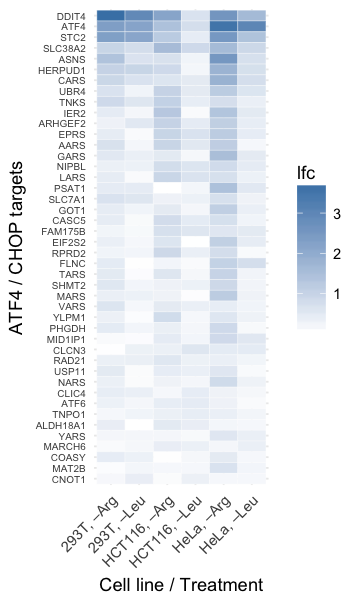

In [34]:
options(repr.plot.width = 3, repr.plot.height = 5)

samplenames  <- c(
    'hct116_arg' = 'HCT116, –Arg',
    'hct116_leu' = 'HCT116, –Leu',
    'hela_arg' = 'HeLa, –Arg',
    'hela_leu' = 'HeLa, –Leu',
    'X293t_arg' = '293T, –Arg',
    'X293t_leu' = '293T, –Leu'
)


heatmapdata %>% 
  mutate(gene_name = forcats::fct_reorder(gene_name, sum.lfc, .desc = F)) %>% 
  select(-protein_id, -sum.lfc) %>% 
  gather(condition, lfc, -gene_name) %>% 
  mutate(condition = samplenames[condition]) %>% 
  ggplot(aes(condition, gene_name)) +
  geom_tile(aes(fill = lfc), color = 'white') +
  scale_fill_gradient(low = 'white', high = 'steelblue') +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.text.y = element_text(size = 6)) +
  ylab("ATF4 / CHOP targets") +
  xlab("Cell line / Treatment")
ggsave('../figures/atf4_targets_heatmap.svg', width = 3, height = 5, units = 'in')

### Subset genes that are downregulated across all cell types and conditions

In [117]:
subsettx <- lfcdata %>%
  # select only genes that are downregulated in 3 cell types and 2 starved conditions
  filter_if(is.numeric, all_vars(. <= 0)) %>% 
  select(transcript_id)

subsetlfcdata <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id") %>% 
  left_join(cds, by = "transcript_id") %>% 
  select(gene_name, everything()) %>% 
  rename_all(funs(str_replace(., "X293t_hrgfp", "X293t"))) %>% 
  rename_if(is.numeric, funs(str_replace(., "^([^_]+_[^_]+).+", "\\1"))) %>% 
  select(-transcript_id) %>% 
  print

# A tibble: 642 x 8
   gene_name hct116_arg hct116_leu hela_arg hela_leu X293t_arg X293t_leu
       <chr>      <dbl>      <dbl>    <dbl>    <dbl>     <dbl>     <dbl>
 1     GAPDH     -0.112     -0.172   -0.293   -0.183    -0.188    -0.484
 2      RPL5     -0.336     -0.363   -0.117   -0.465    -0.517    -0.844
 3      NPM1     -0.412     -0.254   -0.089   -0.098    -0.306    -0.266
 4      RPL6     -0.429     -0.297   -0.003   -0.252    -0.371    -0.578
 5    GNB2L1     -0.725     -0.561   -0.441   -0.342    -0.504    -0.744
 6     RPL7A     -0.359     -0.551   -0.166   -0.358    -0.099    -0.718
 7     RPS3A     -0.342     -0.242   -0.030   -0.534    -0.825    -1.313
 8     RPS24     -1.105     -0.627   -0.314   -0.186    -0.542    -0.737
 9      RPL8     -0.309     -0.199   -0.253   -0.299    -0.534    -0.791
10     RPL19     -0.324     -0.501   -0.131   -0.612    -0.419    -0.944
# ... with 632 more rows, and 1 more variables: protein_id <chr>


###  Plot heat-map of fold-change for mTORC1 targets that are down-regulated across all celltypes and conditions in our datase

In [118]:
heatmapdata <- subsetlfcdata %>% 
  inner_join(mtorc1_target_human_proteins, by = "gene_name") %>% 
  mutate(sum.lfc = rowSums(select_if(., is.numeric))) %>% 
  arrange(desc(sum.lfc)) %>% 
  print

# A tibble: 61 x 9
   gene_name hct116_arg hct116_leu hela_arg hela_leu X293t_arg X293t_leu
       <chr>      <dbl>      <dbl>    <dbl>    <dbl>     <dbl>     <dbl>
 1      NPM1     -0.412     -0.254   -0.089   -0.098    -0.306    -0.266
 2      CNN2     -0.284     -0.173   -0.611   -0.106    -0.408    -0.020
 3   SLC25A5     -0.250     -0.241   -0.407   -0.258    -0.124    -0.358
 4    CLPTM1     -0.248     -0.084   -0.293   -0.047    -0.633    -0.422
 5   SLC25A3     -0.166     -0.260   -0.167   -0.334    -0.225    -0.608
 6     EIF3H     -0.291     -0.087   -0.189   -0.206    -0.360    -0.710
 7    RNF126     -0.492     -0.381   -0.265   -0.425    -0.002    -0.321
 8      RPL6     -0.429     -0.297   -0.003   -0.252    -0.371    -0.578
 9     NAA10     -0.149     -0.001   -0.247   -0.287    -0.698    -0.551
10     RPS10     -0.085     -0.338   -0.009   -0.359    -0.369    -0.825
# ... with 51 more rows, and 2 more variables: protein_id <chr>, sum.lfc <dbl>


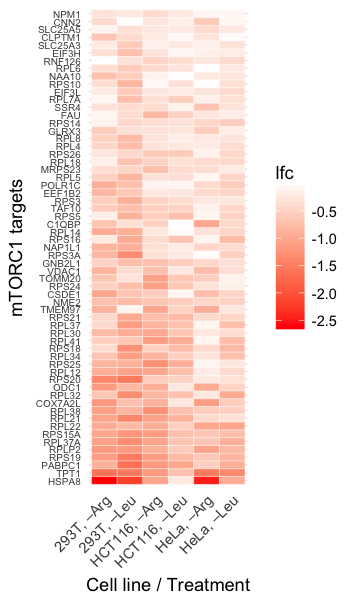

In [119]:
options(repr.plot.width = 3, repr.plot.height = 5)

samplenames  <- c(
    'hct116_arg' = 'HCT116, –Arg',
    'hct116_leu' = 'HCT116, –Leu',
    'hela_arg' = 'HeLa, –Arg',
    'hela_leu' = 'HeLa, –Leu',
    'X293t_arg' = '293T, –Arg',
    'X293t_leu' = '293T, –Leu'
)


heatmapdata %>% 
  mutate(gene_name = forcats::fct_reorder(gene_name, sum.lfc, .desc = F)) %>% 
  select(-protein_id, -sum.lfc) %>% 
  gather(condition, lfc, -gene_name) %>% 
  mutate(condition = samplenames[condition]) %>% 
  ggplot(aes(condition, gene_name)) +
  geom_tile(aes(fill = lfc), color = 'white') +
  scale_fill_gradient(low = 'red', high = 'white') +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.text.y = element_text(size = 6)) +
  ylab("mTORC1 targets") +
  xlab("Cell line / Treatment")
ggsave('../figures/mtorc1_targets_rdnotte_heatmap.svg', width = 3, height = 5, units = 'in')

In [120]:
countdata  <- read_tsv('../tables/cds.counts.20170615.tsv', col_types = c(col_character()))
lfcdata <- read_tsv('../tables/foldchange_samplepairs_201706221.tsv', col_types = c(col_character()))


# these are fold changes that are considered for heatmap
subset <- c('hela_arg_mono_3h.vs.hela_rich_mono_3h',
            'hela_leu_mono_3h.vs.hela_rich_mono_3h',
            'X293t_hrgfp_arg_3h.vs.X293t_hrgfp_rich_3h',
            'X293t_hrgfp_leu_3h.vs.X293t_hrgfp_rich_3h'
           )

# extra sample names from the sample pairs above
subsetsamples <- subset %>% 
  str_split(".vs.") %>% 
  unlist %>% 
  unique

subsettx <- countdata %>% 
  # select only tx having >100 counts across all samples used for fold change
  filter_at(vars(one_of(subsetsamples)), all_vars(. >= 100)) %>% 
  select(transcript_id)

lfcdata  <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id")

print(lfcdata)

# A tibble: 5,132 x 5
   hela_arg_mono_3h.vs.hela_rich_mono_3h hela_leu_mono_3h.vs.hela_rich_mono_3h
                                   <dbl>                                 <dbl>
 1                                 0.337                                -0.362
 2                                 0.841                                -0.036
 3                                -0.293                                -0.183
 4                                -0.163                                -0.097
 5                                 0.076                                -0.423
 6                                -0.248                                -0.301
 7                                -0.417                                -0.033
 8                                 1.483                                 0.009
 9                                 0.326                                 0.088
10                                 1.404                                 0.492
# ... with 5,122 more rows, an

In [99]:
subsettx <- lfcdata %>%
  # select only genes that are upregulated in 3 cell types and 2 starved conditions
  #filter_if(is.numeric, all_vars(. >= 0)) %>% 
  select(transcript_id)

subsetlfcdata <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id") %>% 
  left_join(cds, by = "transcript_id") %>% 
  select(gene_name, everything()) %>% 
  rename_all(funs(str_replace(., "X293t_hrgfp", "X293t"))) %>% 
  rename_if(is.numeric, funs(str_replace(., "^([^_]+_[^_]+).+", "\\1"))) %>% 
  select(-transcript_id) %>% 
  print

# A tibble: 5,132 x 6
    gene_name hela_arg hela_leu X293t_arg X293t_leu        protein_id
        <chr>    <dbl>    <dbl>     <dbl>     <dbl>             <chr>
 1     EEF1A1    0.337   -0.362    -0.274    -1.118 ENSP00000339053.4
 2   HIST1H3B    0.841   -0.036     1.308     0.721 ENSP00000484841.1
 3      GAPDH   -0.293   -0.183    -0.188    -0.484 ENSP00000229239.5
 4       ACTB   -0.163   -0.097     0.236     0.110 ENSP00000349960.4
 5      RPS4X    0.076   -0.423    -0.276    -0.760 ENSP00000362744.4
 6   HIST2H4A   -0.248   -0.301     0.893     0.504 ENSP00000462667.1
 7     TUBA1B   -0.417   -0.033     0.294    -0.095 ENSP00000336799.5
 8   HIST2H3A    1.483    0.009     1.566     0.684 ENSP00000385479.1
 9 HIST2H2AA3    0.326    0.088    -0.258    -0.524 ENSP00000358155.2
10   HIST1H4C    1.404    0.492     0.966     0.568 ENSP00000367034.2
# ... with 5,122 more rows


In [100]:
heatmapdata <- subsetlfcdata %>% 
  inner_join(human_atf4_targets, by = "gene_name") %>% 
  mutate(sum.lfc = rowSums(select_if(., is.numeric))) %>% 
  arrange(desc(sum.lfc)) %>% 
  print

# A tibble: 163 x 7
   gene_name hela_arg hela_leu X293t_arg X293t_leu        protein_id sum.lfc
       <chr>    <dbl>    <dbl>     <dbl>     <dbl>             <chr>   <dbl>
 1      ATF4    3.554    3.022     2.331     2.206 ENSP00000336790.2  11.113
 2     DDIT4    2.576    1.617     3.741     2.920 ENSP00000307305.3  10.854
 3      ATF3    2.904    1.553     2.519     1.653 ENSP00000344352.4   8.629
 4      STC2    2.510    1.419     2.307     2.149 ENSP00000265087.4   8.385
 5   TSC22D3    2.565    1.285     1.210     1.025 ENSP00000361474.2   6.085
 6      ASNS    2.533    0.712     1.399     0.642 ENSP00000175506.4   5.286
 7   HERPUD1    1.794    0.725     1.031     0.972 ENSP00000409555.2   4.522
 8   SLC38A2    1.590    0.895     0.972     0.779 ENSP00000256689.5   4.236
 9      CARS    1.822    0.746     0.927     0.661 ENSP00000380300.5   4.156
10     PNRC2    0.688    0.670     1.169     0.999 ENSP00000334840.7   3.526
# ... with 153 more rows


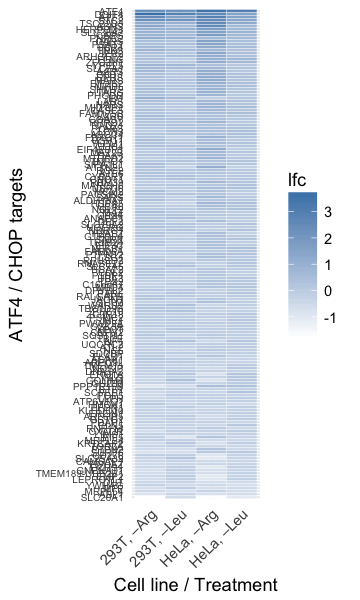

In [101]:
options(repr.plot.width = 3, repr.plot.height = 5)

samplenames  <- c(
    'hela_arg' = 'HeLa, –Arg',
    'hela_leu' = 'HeLa, –Leu',
    'X293t_arg' = '293T, –Arg',
    'X293t_leu' = '293T, –Leu'
)


heatmapdata %>% 
  mutate(gene_name = forcats::fct_reorder(gene_name, sum.lfc, .desc = F)) %>% 
  select(-protein_id, -sum.lfc) %>% 
  gather(condition, lfc, -gene_name) %>% 
  mutate(condition = samplenames[condition]) %>% 
  ggplot(aes(condition, gene_name)) +
  geom_tile(aes(fill = lfc), color = 'white') +
  scale_fill_gradient(low = 'white', high = 'steelblue') +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.text.y = element_text(size = 6)) +
  ylab("ATF4 / CHOP targets") +
  xlab("Cell line / Treatment")
ggsave('../figures/atf4chop_targets_heatmap_hela293tonly_allgenes.svg', width = 3, height = 5, units = 'in')

In [124]:
subsettx <- lfcdata %>%
  # select only genes that are downregulated in 3 cell types and 2 starved conditions
  filter_if(is.numeric, all_vars(. <= 0)) %>% 
  select(transcript_id)

subsetlfcdata <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id") %>% 
  left_join(cds, by = "transcript_id") %>% 
  select(gene_name, everything()) %>% 
  rename_all(funs(str_replace(., "X293t_hrgfp", "X293t"))) %>% 
  rename_if(is.numeric, funs(str_replace(., "^([^_]+_[^_]+).+", "\\1"))) %>% 
  select(-transcript_id) %>% 
  print

# A tibble: 1,209 x 6
   gene_name hela_arg hela_leu X293t_arg X293t_leu        protein_id
       <chr>    <dbl>    <dbl>     <dbl>     <dbl>             <chr>
 1     GAPDH   -0.293   -0.183    -0.188    -0.484 ENSP00000229239.5
 2 HNRNPA2B1   -0.437   -0.170    -0.309    -0.267 ENSP00000349101.7
 3      RPL5   -0.117   -0.465    -0.517    -0.844 ENSP00000359345.2
 4      NPM1   -0.089   -0.098    -0.306    -0.266 ENSP00000296930.5
 5      RPL6   -0.003   -0.252    -0.371    -0.578 ENSP00000202773.9
 6      LDHB   -0.255   -0.107    -0.335    -0.258 ENSP00000229319.1
 7    GNB2L1   -0.441   -0.342    -0.504    -0.744 ENSP00000426909.1
 8     RPL7A   -0.166   -0.358    -0.099    -0.718 ENSP00000361076.3
 9     RPS3A   -0.030   -0.534    -0.825    -1.313 ENSP00000346050.3
10     RPS24   -0.314   -0.186    -0.542    -0.737 ENSP00000361435.3
# ... with 1,199 more rows


In [125]:
heatmapdata <- subsetlfcdata %>% 
  inner_join(mtorc1_target_human_proteins, by = "gene_name") %>% 
  mutate(sum.lfc = rowSums(select_if(., is.numeric))) %>% 
  arrange(desc(sum.lfc)) %>% 
  print

# A tibble: 72 x 7
   gene_name hela_arg hela_leu X293t_arg X293t_leu        protein_id sum.lfc
       <chr>    <dbl>    <dbl>     <dbl>     <dbl>             <chr>   <dbl>
 1      CCT2   -0.128   -0.116    -0.007    -0.068 ENSP00000299300.6  -0.319
 2      KARS   -0.028   -0.081    -0.011    -0.218 ENSP00000325448.5  -0.338
 3     CCND3   -0.186   -0.230    -0.062    -0.124 ENSP00000362082.4  -0.602
 4      NPM1   -0.089   -0.098    -0.306    -0.266 ENSP00000296930.5  -0.759
 5     SRP72   -0.163   -0.154    -0.278    -0.185 ENSP00000342181.5  -0.780
 6       FAU   -0.264   -0.195    -0.119    -0.390 ENSP00000434440.1  -0.968
 7    RNF126   -0.265   -0.425    -0.002    -0.321 ENSP00000292363.3  -1.013
 8    CHCHD3   -0.378   -0.475    -0.098    -0.097 ENSP00000262570.5  -1.048
 9      CNN2   -0.611   -0.106    -0.408    -0.020 ENSP00000263097.2  -1.145
10   SLC25A5   -0.407   -0.258    -0.124    -0.358 ENSP00000360671.4  -1.147
# ... with 62 more rows


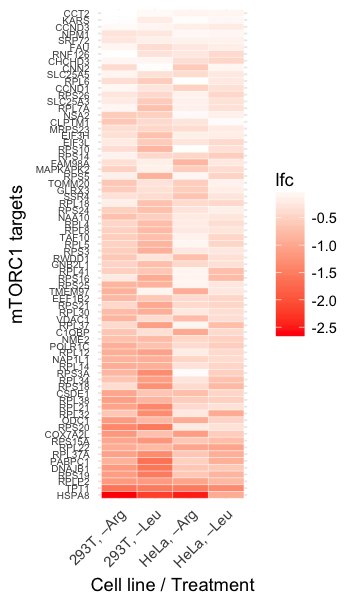

In [126]:
options(repr.plot.width = 3, repr.plot.height = 5)

samplenames  <- c(
    'hela_arg' = 'HeLa, –Arg',
    'hela_leu' = 'HeLa, –Leu',
    'X293t_arg' = '293T, –Arg',
    'X293t_leu' = '293T, –Leu'
)


heatmapdata %>% 
  mutate(gene_name = forcats::fct_reorder(gene_name, sum.lfc, .desc = F)) %>% 
  select(-protein_id, -sum.lfc) %>% 
  gather(condition, lfc, -gene_name) %>% 
  mutate(condition = samplenames[condition]) %>% 
  ggplot(aes(condition, gene_name)) +
  geom_tile(aes(fill = lfc), color = 'white') +
  scale_fill_gradient(low = 'red', high = 'white') +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.text.y = element_text(size = 6)) +
  ylab("mTORC1 targets") +
  xlab("Cell line / Treatment")
ggsave('../figures/mtorc1_targets_rdnotte_heatmap_hela293tonly.svg', width = 3, height = 5, units = 'in')

In [151]:
countdata  <- read_tsv('../tables/cds.counts.20170615.tsv', col_types = c(col_character()))
lfcdata <- read_tsv('../tables/foldchange_samplepairs_201706221.tsv', col_types = c(col_character()))


# these are fold changes that are considered for heatmap
subset <- c('X293t_hrgfp_arg_3h.vs.X293t_hrgfp_rich_3h',
            'X293t_hrgfp_leu_3h.vs.X293t_hrgfp_rich_3h'
           )

# extra sample names from the sample pairs above
subsetsamples <- subset %>% 
  str_split(".vs.") %>% 
  unlist %>% 
  unique

subsettx <- countdata %>% 
  # select only tx having >100 counts across all samples used for fold change
  filter_at(vars(one_of(subsetsamples)), all_vars(. >= 100)) %>% 
  select(transcript_id)

lfcdata  <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id")

print(lfcdata)

# A tibble: 7,199 x 3
   X293t_hrgfp_arg_3h.vs.X293t_hrgfp_rich_3h
                                       <dbl>
 1                                    -0.274
 2                                     1.308
 3                                    -0.188
 4                                     0.236
 5                                    -0.276
 6                                     0.893
 7                                     0.294
 8                                     1.566
 9                                    -0.258
10                                     0.966
# ... with 7,189 more rows, and 2 more variables:
#   X293t_hrgfp_leu_3h.vs.X293t_hrgfp_rich_3h <dbl>, transcript_id <chr>


In [215]:
subsettx <- lfcdata %>%
  # select only genes that are downregulated in 3 cell types and 2 starved conditions
  filter_if(is.numeric, all_vars(. <= 0)) %>% 
  select(transcript_id)

subsetlfcdata <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id") %>% 
  left_join(cds, by = "transcript_id") %>% 
  select(gene_name, everything()) %>% 
  rename_all(funs(str_replace(., "X293t_hrgfp", "X293t"))) %>% 
  rename_if(is.numeric, funs(str_replace(., "^([^_]+_[^_]+).+", "\\1"))) %>% 
  select(-transcript_id) %>% 
  print

# A tibble: 2,608 x 4
    gene_name X293t_arg X293t_leu        protein_id
        <chr>     <dbl>     <dbl>             <chr>
 1     EEF1A1    -0.274    -1.118 ENSP00000339053.4
 2      GAPDH    -0.188    -0.484 ENSP00000229239.5
 3      RPS4X    -0.276    -0.760 ENSP00000362744.4
 4 HIST2H2AA3    -0.258    -0.524 ENSP00000358155.2
 5  HNRNPA2B1    -0.309    -0.267 ENSP00000349101.7
 6       RPL5    -0.517    -0.844 ENSP00000359345.2
 7       ENO1    -0.005    -0.091 ENSP00000234590.4
 8       NPM1    -0.306    -0.266 ENSP00000296930.5
 9       RPL6    -0.371    -0.578 ENSP00000202773.9
10       LDHB    -0.335    -0.258 ENSP00000229319.1
# ... with 2,598 more rows


In [216]:
heatmapdata <- subsetlfcdata %>% 
  inner_join(mtorc1_target_human_proteins, by = "gene_name") %>% 
  mutate(sum.lfc = rowSums(select_if(., is.numeric))) %>% 
  arrange(desc(sum.lfc)) %>% 
  print

# A tibble: 104 x 5
   gene_name X293t_arg X293t_leu        protein_id sum.lfc
       <chr>     <dbl>     <dbl>             <chr>   <dbl>
 1      CCT2    -0.007    -0.068 ENSP00000299300.6  -0.075
 2     CCND3    -0.062    -0.124 ENSP00000362082.4  -0.186
 3    CHCHD3    -0.098    -0.097 ENSP00000262570.5  -0.195
 4    COL4A1    -0.096    -0.099 ENSP00000364979.4  -0.195
 5     WDR89    -0.035    -0.175 ENSP00000267522.3  -0.210
 6      KARS    -0.011    -0.218 ENSP00000325448.5  -0.229
 7    MRPL30    -0.242    -0.019 ENSP00000338057.3  -0.261
 8      CCT4    -0.138    -0.153 ENSP00000377958.3  -0.291
 9    TMED10    -0.273    -0.040 ENSP00000303145.4  -0.313
10    RNF126    -0.002    -0.321 ENSP00000292363.3  -0.323
# ... with 94 more rows


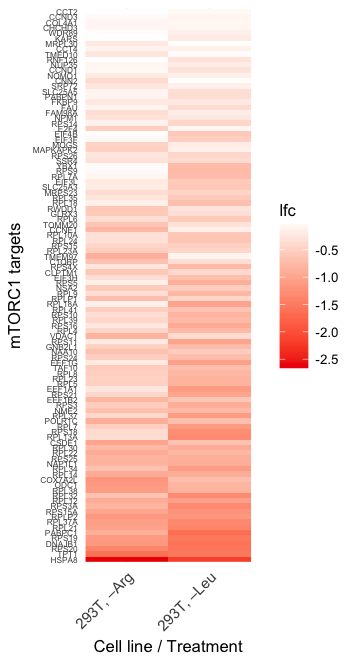

In [222]:
options(repr.plot.width = 3, repr.plot.height = 5.5) #2.64 vs 2.5 for width for mtor vs atf4 gives same dimensions of tiles. (1.04 + x more targets?)

samplenames  <- c(
    'X293t_arg' = '293T, –Arg',
    'X293t_leu' = '293T, –Leu'
)


heatmapdata %>% 
  mutate(gene_name = forcats::fct_reorder(gene_name, sum.lfc, .desc = F)) %>% 
  select(-protein_id, -sum.lfc) %>% 
  gather(condition, lfc, -gene_name) %>% 
  mutate(condition = samplenames[condition]) %>% 
  ggplot(aes(condition, gene_name)) +
  geom_raster(aes(fill = lfc), color = 'white') +
  scale_fill_gradient(low = 'red2', high = 'white') +
  theme_minimal(base_family='Arial', base_size=10) +
  theme(axis.text.x = element_text(angle=45,hjust=1,size=9),
        axis.text.y = element_text(size = 5)) +
  ylab("mTORC1 targets") +
  xlab("Cell line / Treatment") +
  scale_x_discrete(expand = c(0, 0))
ggsave('../figures/mtorc1_targets_rdnotte_heatmap_293tonly.svg', width = 3, height = 5.5, units = 'in')

In [223]:
subsettx <- lfcdata %>%
  # select only genes that are downregulated in 3 cell types and 2 starved conditions
  filter_if(is.numeric, all_vars(. >= 0)) %>% 
  select(transcript_id)

subsetlfcdata <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id") %>% 
  left_join(cds, by = "transcript_id") %>% 
  select(gene_name, everything()) %>% 
  rename_all(funs(str_replace(., "X293t_hrgfp", "X293t"))) %>% 
  rename_if(is.numeric, funs(str_replace(., "^([^_]+_[^_]+).+", "\\1"))) %>% 
  select(-transcript_id) %>% 
  print

# A tibble: 2,443 x 4
   gene_name X293t_arg X293t_leu        protein_id
       <chr>     <dbl>     <dbl>             <chr>
 1  HIST1H3B     1.308     0.721 ENSP00000484841.1
 2      ACTB     0.236     0.110 ENSP00000349960.4
 3  HIST2H4A     0.893     0.504 ENSP00000462667.1
 4  HIST2H3A     1.566     0.684 ENSP00000385479.1
 5  HIST1H4C     0.966     0.568 ENSP00000367034.2
 6  HIST1H1C     0.553     0.253 ENSP00000339566.2
 7       UBB     0.245     0.178 ENSP00000304697.3
 8 HIST2H2BE     1.092     0.426 ENSP00000358151.2
 9  HIST1H4E     0.887     0.296 ENSP00000484789.1
10  HIST1H3H     1.166     0.421 ENSP00000358160.2
# ... with 2,433 more rows


In [224]:
heatmapdata <- subsetlfcdata %>% 
  inner_join(human_atf4_targets, by = "gene_name") %>% 
  mutate(sum.lfc = rowSums(select_if(., is.numeric))) %>% 
  arrange(desc(sum.lfc)) %>% 
  print

# A tibble: 100 x 5
   gene_name X293t_arg X293t_leu        protein_id sum.lfc
       <chr>     <dbl>     <dbl>             <chr>   <dbl>
 1     DDIT4     3.741     2.920 ENSP00000307305.3   6.661
 2      ATF4     2.331     2.206 ENSP00000336790.2   4.537
 3     SESN2     2.534     2.002 ENSP00000253063.3   4.536
 4      STC2     2.307     2.149 ENSP00000265087.4   4.456
 5      ATF3     2.519     1.653 ENSP00000344352.4   4.172
 6       CTH     1.935     1.027 ENSP00000359976.3   2.962
 7   TSC22D3     1.210     1.025 ENSP00000361474.2   2.235
 8     PNRC2     1.169     0.999 ENSP00000334840.7   2.168
 9     SNAI2     1.329     0.800 ENSP00000020945.1   2.129
10      ASNS     1.399     0.642 ENSP00000175506.4   2.041
# ... with 90 more rows


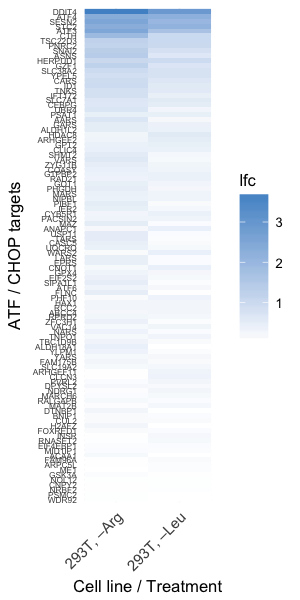

In [225]:
options(repr.plot.width = 2.5, repr.plot.height = 5)

samplenames  <- c(
    'X293t_arg' = '293T, –Arg',
    'X293t_leu' = '293T, –Leu'
)


heatmapdata %>% 
  mutate(gene_name = forcats::fct_reorder(gene_name, sum.lfc, .desc = F)) %>% 
  select(-protein_id, -sum.lfc) %>% 
  gather(condition, lfc, -gene_name) %>% 
  mutate(condition = samplenames[condition]) %>% 
  ggplot(aes(condition, gene_name)) +
  geom_raster(aes(fill = lfc), color = 'white') +
  scale_fill_gradient(low = 'white', high = 'steelblue3') +
  theme_minimal(base_family='Arial', base_size=10) +
  theme(axis.text.x = element_text(angle = 45, hjust=1, size=9),
        axis.text.y = element_text(size = 5)) +
  ylab("ATF / CHOP targets") +
  xlab("Cell line / Treatment") +
  scale_x_discrete(expand = c(0, 0))
ggsave('../figures/atf4chop_targets_heatmap_293tonly.svg', width = 3, height = 5.5, units = 'in')

In [227]:
countdata  <- read_tsv('../tables/cds.counts.20170615.tsv', col_types = c(col_character()))
lfcdata <- read_tsv('../tables/foldchange_samplepairs_201706221.tsv', col_types = c(col_character()))


# these are fold changes that are considered for heatmap
subset <- c('X293t_arg_6h.vs.X293t_rich_6h',
            'X293t_leu_6h.vs.X293t_rich_6h'
           )

# extra sample names from the sample pairs above
subsetsamples <- subset %>% 
  str_split(".vs.") %>% 
  unlist %>% 
  unique

subsettx <- countdata %>% 
  # select only tx having >100 counts across all samples used for fold change
  filter_at(vars(one_of(subsetsamples)), all_vars(. >= 100)) %>% 
  select(transcript_id)

lfcdata  <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id")

print(lfcdata)

# A tibble: 6,346 x 3
   X293t_arg_6h.vs.X293t_rich_6h X293t_leu_6h.vs.X293t_rich_6h
                           <dbl>                         <dbl>
 1                         0.043                        -0.958
 2                         1.091                         0.397
 3                        -0.446                        -0.785
 4                        -0.269                        -0.217
 5                        -0.172                        -0.952
 6                         0.327                        -0.089
 7                        -0.329                        -0.453
 8                         1.414                         0.689
 9                         0.177                         0.028
10                         0.944                         0.509
# ... with 6,336 more rows, and 1 more variables: transcript_id <chr>


In [228]:
subsettx <- lfcdata %>%
  # select only genes that are downregulated in 3 cell types and 2 starved conditions
  filter_if(is.numeric, all_vars(. <= 0)) %>% 
  select(transcript_id)

subsetlfcdata <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id") %>% 
  left_join(cds, by = "transcript_id") %>% 
  select(gene_name, everything()) %>% 
  #rename_all(funs(str_replace(., "X293t_hrgfp", "X293t"))) %>% 
  rename_if(is.numeric, funs(str_replace(., "^([^_]+_[^_]+).+", "\\1"))) %>% 
  select(-transcript_id) %>% 
  print

# A tibble: 2,509 x 4
   gene_name X293t_arg X293t_leu        protein_id
       <chr>     <dbl>     <dbl>             <chr>
 1     GAPDH    -0.446    -0.785 ENSP00000229239.5
 2      ACTB    -0.269    -0.217 ENSP00000349960.4
 3     RPS4X    -0.172    -0.952 ENSP00000362744.4
 4    TUBA1B    -0.329    -0.453 ENSP00000336799.5
 5      RPL5    -0.132    -0.782 ENSP00000359345.2
 6  HSP90AA1    -0.162    -0.007 ENSP00000216281.7
 7      ENO1    -0.049    -0.078 ENSP00000234590.4
 8      EEF2    -0.092    -0.554 ENSP00000307940.5
 9     ACTG1    -0.360    -0.599 ENSP00000331514.2
10      NPM1    -0.359    -0.475 ENSP00000296930.5
# ... with 2,499 more rows


In [229]:
heatmapdata <- subsetlfcdata %>% 
  inner_join(mtorc1_target_human_proteins, by = "gene_name") %>% 
  mutate(sum.lfc = rowSums(select_if(., is.numeric))) %>% 
  arrange(desc(sum.lfc)) %>% 
  print

# A tibble: 105 x 5
   gene_name X293t_arg X293t_leu        protein_id sum.lfc
       <chr>     <dbl>     <dbl>             <chr>   <dbl>
 1  HSP90AB1    -0.050    -0.210 ENSP00000325875.3  -0.260
 2     CAND2    -0.016    -0.319 ENSP00000387641.2  -0.335
 3      PRCP    -0.258    -0.078 ENSP00000317362.3  -0.336
 4     EIF3I    -0.118    -0.224 ENSP00000362688.1  -0.342
 5   ATP13A1    -0.172    -0.195 ENSP00000349877.6  -0.367
 6      KARS    -0.061    -0.314 ENSP00000325448.5  -0.375
 7      QARS    -0.011    -0.364 ENSP00000307567.6  -0.375
 8    NT5DC2    -0.300    -0.108 ENSP00000302468.4  -0.408
 9     NUP35    -0.127    -0.355 ENSP00000295119.4  -0.482
10    PABPN1    -0.284    -0.281 ENSP00000216727.4  -0.565
# ... with 95 more rows


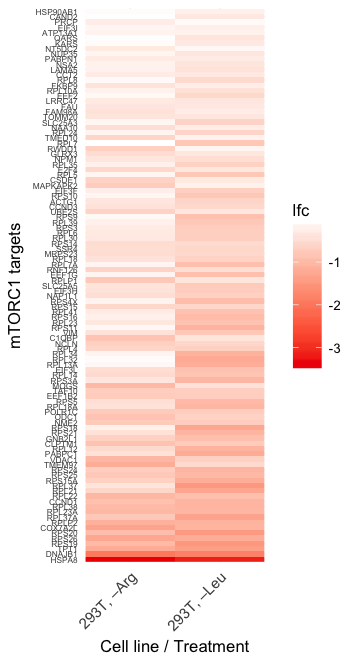

In [230]:
options(repr.plot.width = 3, repr.plot.height = 5.5) #2.64 vs 2.5 for width for mtor vs atf4 gives same dimensions of tiles. (1.04 + x more targets?)

samplenames  <- c(
    'X293t_arg' = '293T, –Arg',
    'X293t_leu' = '293T, –Leu'
)


heatmapdata %>% 
  mutate(gene_name = forcats::fct_reorder(gene_name, sum.lfc, .desc = F)) %>% 
  select(-protein_id, -sum.lfc) %>% 
  gather(condition, lfc, -gene_name) %>% 
  mutate(condition = samplenames[condition]) %>% 
  ggplot(aes(condition, gene_name)) +
  geom_raster(aes(fill = lfc), color = 'white') +
  scale_fill_gradient(low = 'red2', high = 'white') +
  theme_minimal(base_family='Arial', base_size=10) +
  theme(axis.text.x = element_text(angle=45,hjust=1,size=9),
        axis.text.y = element_text(size = 5)) +
  ylab("mTORC1 targets") +
  xlab("Cell line / Treatment") +
  scale_x_discrete(expand = c(0, 0))
ggsave('../figures/mtorc1_targets_rdnotte_heatmap_wt293t6honly.svg', width = 3, height = 5.5, units = 'in')

In [231]:
subsettx <- lfcdata %>%
  # select only genes that are downregulated in 3 cell types and 2 starved conditions
  filter_if(is.numeric, all_vars(. >= 0)) %>% 
  select(transcript_id)

subsetlfcdata <- lfcdata %>% 
  select(one_of(subset), transcript_id) %>% 
  right_join(subsettx, by = "transcript_id") %>% 
  left_join(cds, by = "transcript_id") %>% 
  select(gene_name, everything()) %>% 
  #rename_all(funs(str_replace(., "X293t_hrgfp", "X293t"))) %>% 
  rename_if(is.numeric, funs(str_replace(., "^([^_]+_[^_]+).+", "\\1"))) %>% 
  select(-transcript_id) %>% 
  print

# A tibble: 2,392 x 4
    gene_name X293t_arg X293t_leu        protein_id
        <chr>     <dbl>     <dbl>             <chr>
 1   HIST1H3B     1.091     0.397 ENSP00000484841.1
 2   HIST2H3A     1.414     0.689 ENSP00000385479.1
 3 HIST2H2AA3     0.177     0.028 ENSP00000358155.2
 4   HIST1H4C     0.944     0.509 ENSP00000367034.2
 5   HIST1H1C     0.720     0.530 ENSP00000339566.2
 6       PLS3     0.601     0.502 ENSP00000348163.3
 7     HNRNPK     0.230     0.188 ENSP00000365439.3
 8   HIST1H4E     1.026     0.308 ENSP00000484789.1
 9   HIST1H3H     1.191     0.440 ENSP00000358160.2
10   HIST1H1E     1.384     0.725 ENSP00000307705.3
# ... with 2,382 more rows


In [232]:
heatmapdata <- subsetlfcdata %>% 
  inner_join(human_atf4_targets, by = "gene_name") %>% 
  mutate(sum.lfc = rowSums(select_if(., is.numeric))) %>% 
  arrange(desc(sum.lfc)) %>% 
  print

# A tibble: 101 x 5
   gene_name X293t_arg X293t_leu        protein_id sum.lfc
       <chr>     <dbl>     <dbl>             <chr>   <dbl>
 1   SLC7A11     3.037     3.052 ENSP00000280612.5   6.089
 2       CTH     3.089     2.399 ENSP00000359976.3   5.488
 3      STC2     2.494     2.748 ENSP00000265087.4   5.242
 4      ATF4     2.238     2.581 ENSP00000336790.2   4.819
 5      PCK2     2.537     2.238 ENSP00000216780.4   4.775
 6     SESN2     1.985     2.546 ENSP00000253063.3   4.531
 7      ASNS     2.408     2.061 ENSP00000175506.4   4.469
 8     DDIT4     2.260     2.122 ENSP00000307305.3   4.382
 9   TSC22D3     2.266     2.068 ENSP00000361474.2   4.334
10      DDR2     2.359     1.963 ENSP00000356898.3   4.322
# ... with 91 more rows


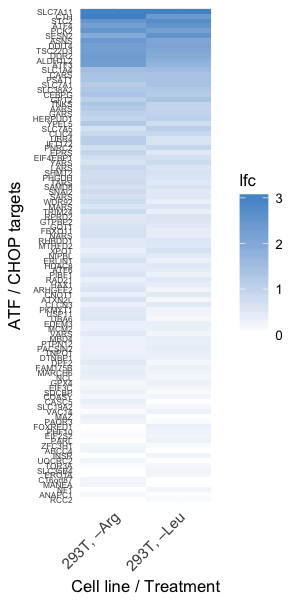

In [234]:
options(repr.plot.width = 2.5, repr.plot.height = 5)

samplenames  <- c(
    'X293t_arg' = '293T, –Arg',
    'X293t_leu' = '293T, –Leu'
)


heatmapdata %>% 
  mutate(gene_name = forcats::fct_reorder(gene_name, sum.lfc, .desc = F)) %>% 
  select(-protein_id, -sum.lfc) %>% 
  gather(condition, lfc, -gene_name) %>% 
  mutate(condition = samplenames[condition]) %>% 
  ggplot(aes(condition, gene_name)) +
  geom_raster(aes(fill = lfc), color = 'white') +
  scale_fill_gradient(low = 'white', high = 'steelblue3') +
  theme_minimal(base_family='Arial', base_size=10) +
  theme(axis.text.x = element_text(angle = 45, hjust=1, size=9),
        axis.text.y = element_text(size = 5)) +
  ylab("ATF / CHOP targets") +
  xlab("Cell line / Treatment") +
  scale_x_discrete(expand = c(0, 0))
ggsave('../figures/atf4chop_targets_heatmap_wt293t6honly.svg', width = 3, height = 5.5, units = 'in')